In [ ]:

from google.colab import files

uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print(f"Uploaded file: {file_name}")


Saving test.ft.txt to test.ft.txt
Uploaded file: test.ft.txt


In [ ]:

#@title 1. Keep this tab alive to prevent Colab from disconnecting you { display-mode: "form" }

#@markdown Press play on the music player that will appear below:
%%html
<audio src="https://oobabooga.github.io/silence.m4a" controls>



In [ ]:
import pandas as pd


with open(file_name, 'r') as file:
    for _ in range(10):  # Print the first 10 lines
        print(file.readline())


try:
    df = pd.read_csv(file_name, delimiter=',', on_bad_lines='skip', engine='python')
    print("File loaded successfully!")
except Exception as e:
    print(f"Error loading file: {e}")


__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this, no matter black, white, young, old, male, female EVERYBODY says one thing "Who was that singing ?"

__label__2 One of the best game music soundtracks - for a game I didn't really play: Despite the fact that I have only played a small portion of the game, the music I heard (plus the connection to Chrono Trigger which was great as well) led me to purchase the soundtrack, and it remains one of my favorite albums. There is an incredible mix of fun, epic, and emotional songs. Those sad and beautiful tracks I especially like, as there's not too many of t

In [ ]:

print("Column names in the dataset:")
print(df.columns.tolist())


Column names in the dataset:
["__label__2 Great CD: My lovely Pat has one of the GREAT voices of her generation. I have listened to this CD for YEARS and I still LOVE IT. When I'm in a good mood it makes me feel better. A bad mood just evaporates like sugar in the rain. This CD just oozes LIFE. Vocals are jusat STUUNNING and lyrics just kill. One of life's hidden gems. This is a desert isle CD in my book. Why she never made it big is just beyond me. Everytime I play this", ' no matter black', ' white', ' young', ' old', ' male', ' female EVERYBODY says one thing "Who was that singing ?"']


In [ ]:

df.rename(columns={df.columns[0]: 'review'}, inplace=True)


print("Updated column names:")
print(df.columns.tolist())


Updated column names:
['review', ' no matter black', ' white', ' young', ' old', ' male', ' female EVERYBODY says one thing "Who was that singing ?"']


In [ ]:

df.dropna(subset=['review'], inplace=True)


print("Cleaned dataset preview:")
print(df.head())


Cleaned dataset preview:
                                              review  \
0  __label__2 One of the best game music soundtra...   
1  __label__1 Batteries died within a year ...: I...   
2                              __label__2 works fine   
3  __label__2 Great for the non-audiophile: Revie...   
4  __label__1 DVD Player crapped out after one ye...   

                                     no matter black  \
0   the music I heard (plus the connection to Chr...   
1                                 after about a year   
2   but Maha Energy is better: Check out Maha Ene...   
3   but don't want to replace them with DVD's. Th...   
4   but hte DVD side is useless. I understand tha...   

                                               white  \
0   and it remains one of my favorite albums. The...   
1   the batteries would not hold a charge. Might ...   
2   with option for slower charge (better for bat...   
3   easy to setup and resolution and special effe...   
4   but after not eve

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer


nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()


def get_sentiment(text):
    sentiment_score = sia.polarity_scores(text)['compound']
    if sentiment_score >= 0.05:
        return "Positive"
    elif sentiment_score <= -0.05:
        return "Negative"
    else:
        return "Neutral"


df['sentiment'] = df['review'].apply(get_sentiment)


print("Labeled dataset preview:")
print(df[['review', 'sentiment']].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Labeled dataset preview:
                                              review sentiment
0  __label__2 One of the best game music soundtra...  Positive
1  __label__1 Batteries died within a year ...: I...  Positive
2                              __label__2 works fine  Positive
3  __label__2 Great for the non-audiophile: Revie...  Positive
4  __label__1 DVD Player crapped out after one ye...  Negative


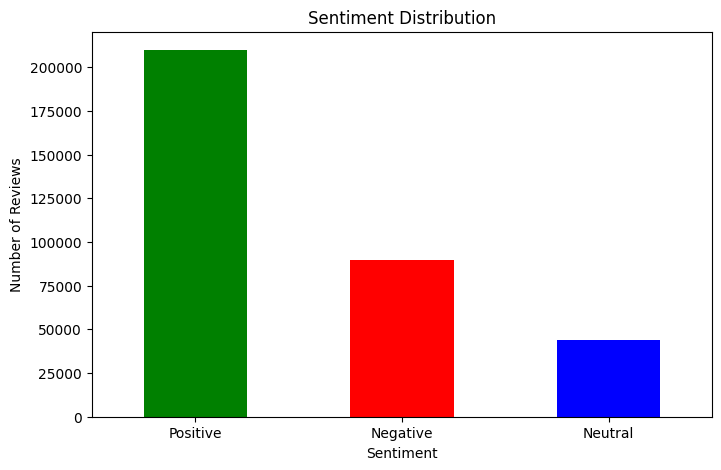

In [ ]:
import matplotlib.pyplot as plt


sentiment_counts = df['sentiment'].value_counts()


plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.show()


In [ ]:

df.to_csv('labeled_reviews.csv', index=False)


from google.colab import files
files.download('labeled_reviews.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.corpus import stopwords
import string
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))


def preprocess_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])  # Remove punctuation
    text = ' '.join([word for word in text.split() if word not in stop_words])  # Remove stopwords
    return text

# Apply preprocessing
df['cleaned_review'] = df['review'].apply(preprocess_text)
print("Preview of cleaned reviews:")
print(df[['review', 'cleaned_review']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Preview of cleaned reviews:
                                              review  \
0  __label__2 One of the best game music soundtra...   
1  __label__1 Batteries died within a year ...: I...   
2                              __label__2 works fine   
3  __label__2 Great for the non-audiophile: Revie...   
4  __label__1 DVD Player crapped out after one ye...   

                                      cleaned_review  
0  label2 one best game music soundtracks game di...  
1  label1 batteries died within year bought charg...  
2                                  label2 works fine  
3  label2 great nonaudiophile reviewed quite bit ...  
4  label1 dvd player crapped one year also began ...  


In [ ]:
# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2))  # Unigrams and bigrams
tfidf_features = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# Count Vectorizer
count_vectorizer = CountVectorizer(ngram_range=(1, 2))  # Unigrams and bigrams
count_features = count_vectorizer.fit_transform(df['cleaned_review'])

print(f"TF-IDF shape: {tfidf_features.shape}")
print(f"Count Vectorizer shape: {count_features.shape}")


TF-IDF shape: (343415, 2995471)
Count Vectorizer shape: (343415, 2995471)


In [ ]:
from sklearn.model_selection import train_test_split

# Target variable
y = df['sentiment'].map({'Positive': 1, 'Negative': 0, 'Neutral': 2})  # Map sentiments to integers

# Split data for TF-IDF features
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(tfidf_features, y, test_size=0.2, random_state=42)

# Split data for Count Vectorizer features
X_train_count, X_test_count, _, _ = train_test_split(count_features, y, test_size=0.2, random_state=42)


In [ ]:
# Import necessary libraries
from sklearn.svm import LinearSVC
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import numpy as np

# Shuffle training data
X_train_dense, y_train_dense = shuffle(X_train_tfidf, y_train, random_state=42)

# Initialize the LinearSVC model
svm_model = LinearSVC(max_iter=1000)

# Split the data into chunks
num_chunks = 100  # Number of updates to simulate progress
chunk_size = X_train_tfidf.shape[0] // num_chunks  # Use shape[0] for sparse matrix row count

print("\nTraining SVM with progress tracking...")
with tqdm(total=num_chunks) as pbar:
    for i in range(num_chunks):
        # Get the next chunk of data
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size if (i + 1) * chunk_size <= X_train_tfidf.shape[0] else X_train_tfidf.shape[0]

        X_chunk = X_train_tfidf[start_idx:end_idx]
        y_chunk = y_train[start_idx:end_idx]

        # Fit the model on the current chunk
        svm_model.fit(X_chunk, y_chunk)

        # Update the progress bar
        pbar.update(1)

# Evaluate the model on the test set
svm_pred = svm_model.predict(X_test_tfidf)
print(f"SVM Accuracy: {accuracy_score(y_test, svm_pred):.2f}")
print(f"Classification Report for SVM:\n{classification_report(y_test, svm_pred)}")



Training SVM with progress tracking...


100%|██████████| 100/100 [00:25<00:00,  3.97it/s]

SVM Accuracy: 0.69
Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.74      0.33      0.46     17835
           1       0.68      0.97      0.80     42078
           2       0.77      0.08      0.15      8770

    accuracy                           0.69     68683
   macro avg       0.73      0.46      0.47     68683
weighted avg       0.71      0.69      0.63     68683



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm
import numpy as np

# Shuffle training data
X_train_dense, y_train_dense = shuffle(X_train_tfidf, y_train, random_state=42)

# Initialize the Decision Tree model
decision_tree_model = DecisionTreeClassifier()

# Split the data into chunks
num_chunks = 100
chunk_size = X_train_tfidf.shape[0] // num_chunks

print("\nTraining Decision Tree with progress tracking...")
with tqdm(total=num_chunks) as pbar:
    for i in range(num_chunks):
        # Get the next chunk of data
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size if (i + 1) * chunk_size <= X_train_tfidf.shape[0] else X_train_tfidf.shape[0]

        X_chunk = X_train_tfidf[start_idx:end_idx]
        y_chunk = y_train[start_idx:end_idx]

        # Fit the model on the current chunk
        decision_tree_model.fit(X_chunk, y_chunk)

        # Update the progress bar
        pbar.update(1)

# Evaluate the model on the test set
dt_pred = decision_tree_model.predict(X_test_tfidf)
print(f"Decision Tree Accuracy: {accuracy_score(y_test, dt_pred):.2f}")
print(f"Classification Report for Decision Tree:\n{classification_report(y_test, dt_pred)}")



Training Decision Tree with progress tracking...


100%|██████████| 100/100 [2:59:19<00:00, 107.60s/it]


Decision Tree Accuracy: 0.66
Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.56      0.48      0.51     17835
           1       0.77      0.78      0.78     42078
           2       0.35      0.45      0.39      8770

    accuracy                           0.66     68683
   macro avg       0.56      0.57      0.56     68683
weighted avg       0.66      0.66      0.66     68683



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Shuffle training data
X_train_dense, y_train_dense = shuffle(X_train_tfidf, y_train, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier()

# Split the data into chunks
num_chunks = 100
chunk_size = X_train_tfidf.shape[0] // num_chunks

print("\nTraining KNN with progress tracking...")
with tqdm(total=num_chunks) as pbar:
    for i in range(num_chunks):
        # Get the next chunk of data
        start_idx = i * chunk_size
        end_idx = (i + 1) * chunk_size if (i + 1) * chunk_size <= X_train_tfidf.shape[0] else X_train_tfidf.shape[0]

        X_chunk = X_train_tfidf[start_idx:end_idx]
        y_chunk = y_train[start_idx:end_idx]

        # Fit the model on the current chunk (simulated for KNN)
        knn_model.fit(X_chunk, y_chunk)

        # Update the progress bar
        pbar.update(1)

# Evaluate the model on the test set
knn_pred = knn_model.predict(X_test_tfidf)
print(f"KNN Accuracy: {accuracy_score(y_test, knn_pred):.2f}")
print(f"Classification Report for KNN:\n{classification_report(y_test, knn_pred)}")



Training KNN with progress tracking...


100%|██████████| 100/100 [00:00<00:00, 341.10it/s]


KNN Accuracy: 0.66
Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.55      0.48      0.51     17835
           1       0.73      0.84      0.78     42078
           2       0.37      0.20      0.26      8770

    accuracy                           0.66     68683
   macro avg       0.55      0.51      0.52     68683
weighted avg       0.64      0.66      0.65     68683



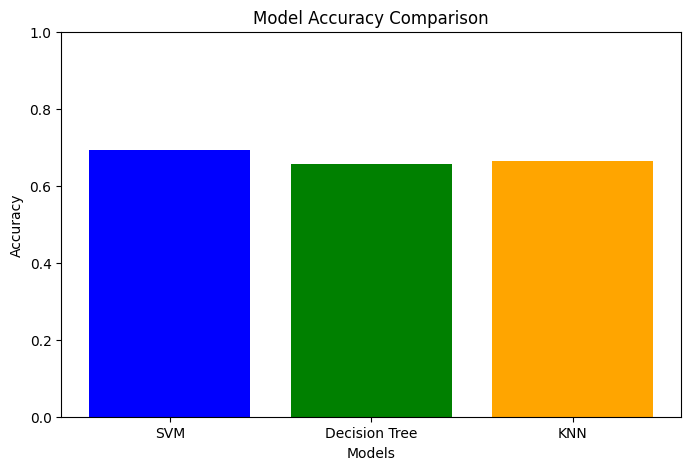

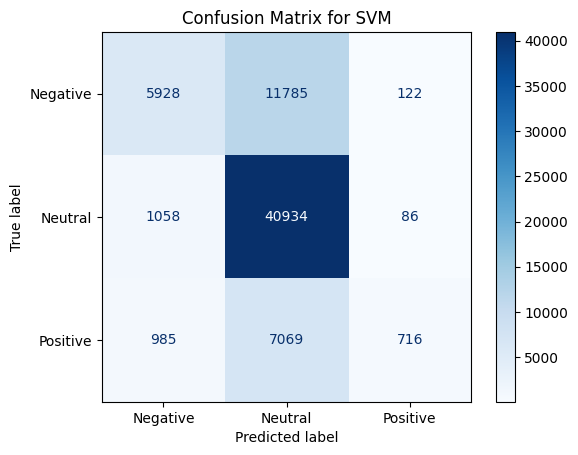

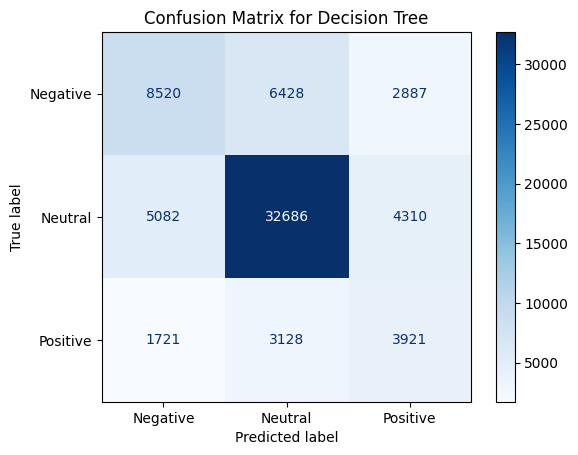

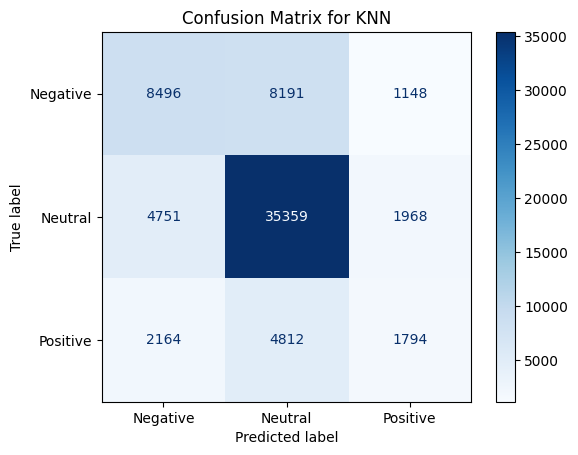

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Collect model accuracies
model_accuracies = {
    'SVM': accuracy_score(y_test, svm_pred),
    'Decision Tree': accuracy_score(y_test, dt_pred),
    'KNN': accuracy_score(y_test, knn_pred)
}

# Plot accuracies as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

# Plot confusion matrices for all models
models = {'SVM': svm_pred, 'Decision Tree': dt_pred, 'KNN': knn_pred}

for model_name, predictions in models.items():
    conf_matrix = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(conf_matrix, display_labels=['Negative', 'Neutral', 'Positive'])
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()


               Accuracy  Precision    Recall  F1-Score
SVM            0.692719   0.711507  0.692719  0.630531
Decision Tree  0.657033   0.663465  0.657033  0.658765
KNN            0.664633   0.637731  0.664633  0.645252


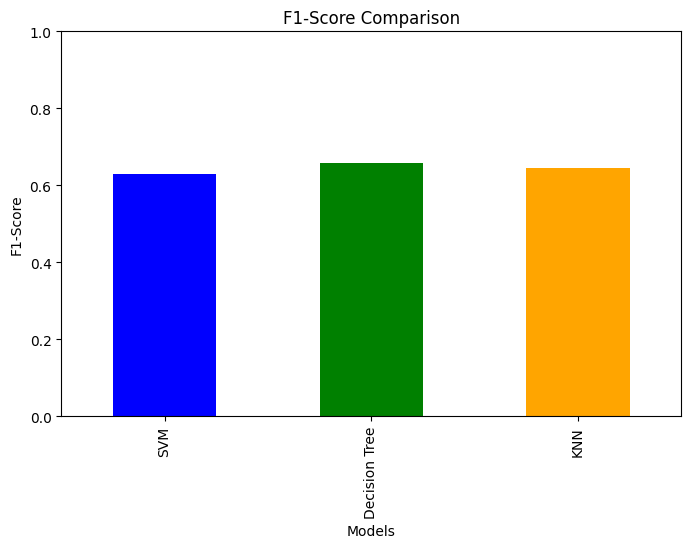

In [ ]:
from sklearn.metrics import precision_recall_fscore_support
import pandas as pd

# Collect metrics for all models
metrics = {}
for name, predictions in models.items():
    precision, recall, f1, _ = precision_recall_fscore_support(y_test, predictions, average='weighted')
    metrics[name] = {'Accuracy': accuracy_score(y_test, predictions),
                     'Precision': precision,
                     'Recall': recall,
                     'F1-Score': f1}

# Create a DataFrame for visualization
metrics_df = pd.DataFrame(metrics).T

# Display the table
print(metrics_df)

# Plot F1-scores
plt.figure(figsize=(8, 5))
metrics_df['F1-Score'].plot(kind='bar', color=['blue', 'green', 'orange'])
plt.title('F1-Score Comparison')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split data into training and testing sets
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize vectorizers
count_vectorizer = CountVectorizer()
tfidf_vectorizer = TfidfVectorizer()

# Transform the text data
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [ ]:
# Import necessary libraries
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Split data into training and testing sets
X = df['review']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize vectorizers with limited feature size
count_vectorizer = CountVectorizer(max_features=5000)
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Transform the text data
X_train_count = count_vectorizer.fit_transform(X_train)
X_test_count = count_vectorizer.transform(X_test)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize models with optimized settings
models = {
    'SVM': LinearSVC(max_iter=2000),
    'Decision Tree': DecisionTreeClassifier(max_depth=50),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Function to train and evaluate models with progress tracking
def train_and_evaluate(models, X_train, X_test, y_train, y_test, vectorizer_name):
    total_models = len(models)
    with tqdm(total=total_models, desc=f"Training with {vectorizer_name}") as pbar:
        for name, model in models.items():
            print(f"\nTraining {name} with {vectorizer_name}...")
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            print(f"{name} Accuracy: {accuracy_score(y_test, y_pred):.2f}")
            print(f"Classification Report for {name}:\n{classification_report(y_test, y_pred)}")
            pbar.update(1)

# Train and evaluate with CountVectorizer
train_and_evaluate(models, X_train_count, X_test_count, y_train, y_test, "CountVectorizer")

# Train and evaluate with TfidfVectorizer
train_and_evaluate(models, X_train_tfidf, X_test_tfidf, y_train, y_test, "TfidfVectorizer")


Training with CountVectorizer:   0%|          | 0/3 [00:00<?, ?it/s]


Training SVM with CountVectorizer...
SVM Accuracy: 0.86


Training with CountVectorizer:  33%|███▎      | 1/3 [01:09<02:18, 69.42s/it]

Classification Report for SVM:
              precision    recall  f1-score   support

    Negative       0.80      0.77      0.78     17835
     Neutral       0.80      0.77      0.78      8770
    Positive       0.90      0.92      0.91     42078

    accuracy                           0.86     68683
   macro avg       0.83      0.82      0.83     68683
weighted avg       0.86      0.86      0.86     68683


Training Decision Tree with CountVectorizer...
Decision Tree Accuracy: 0.73


Training with CountVectorizer:  67%|██████▋   | 2/3 [05:17<02:54, 174.77s/it]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

    Negative       0.61      0.61      0.61     17835
     Neutral       0.50      0.65      0.56      8770
    Positive       0.85      0.80      0.83     42078

    accuracy                           0.73     68683
   macro avg       0.65      0.68      0.67     68683
weighted avg       0.74      0.73      0.74     68683


Training KNN with CountVectorizer...
KNN Accuracy: 0.63


Training with CountVectorizer: 100%|██████████| 3/3 [27:14<00:00, 544.83s/it]


Classification Report for KNN:
              precision    recall  f1-score   support

    Negative       0.58      0.47      0.52     17835
     Neutral       0.31      0.76      0.44      8770
    Positive       0.85      0.67      0.75     42078

    accuracy                           0.63     68683
   macro avg       0.58      0.63      0.57     68683
weighted avg       0.71      0.63      0.65     68683



Training with TfidfVectorizer:   0%|          | 0/3 [00:00<?, ?it/s]


Training SVM with TfidfVectorizer...
SVM Accuracy: 0.86


Training with TfidfVectorizer:  33%|███▎      | 1/3 [00:26<00:52, 26.37s/it]

Classification Report for SVM:
              precision    recall  f1-score   support

    Negative       0.80      0.77      0.78     17835
     Neutral       0.85      0.77      0.81      8770
    Positive       0.89      0.93      0.91     42078

    accuracy                           0.86     68683
   macro avg       0.85      0.82      0.83     68683
weighted avg       0.86      0.86      0.86     68683


Training Decision Tree with TfidfVectorizer...
Decision Tree Accuracy: 0.73


Training with TfidfVectorizer:  67%|██████▋   | 2/3 [05:31<03:10, 190.33s/it]

Classification Report for Decision Tree:
              precision    recall  f1-score   support

    Negative       0.59      0.63      0.61     17835
     Neutral       0.54      0.54      0.54      8770
    Positive       0.84      0.81      0.82     42078

    accuracy                           0.73     68683
   macro avg       0.66      0.66      0.66     68683
weighted avg       0.74      0.73      0.73     68683


Training KNN with TfidfVectorizer...
KNN Accuracy: 0.62


Training with TfidfVectorizer: 100%|██████████| 3/3 [25:32<00:00, 510.68s/it]

Classification Report for KNN:
              precision    recall  f1-score   support

    Negative       0.59      0.45      0.51     17835
     Neutral       0.29      0.60      0.39      8770
    Positive       0.79      0.69      0.74     42078

    accuracy                           0.62     68683
   macro avg       0.56      0.58      0.55     68683
weighted avg       0.67      0.62      0.63     68683



In [ ]:
import matplotlib.pyplot as plt

# Collect best accuracies
model_accuracies = {
    'SVM': grid_svm.best_score_,
    'Decision Tree': grid_dt.best_score_,
    'KNN': grid_knn.best_score_
}

# Plot accuracies as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color=['blue', 'green', 'orange'])
plt.title('Hyperparameter-Tuned Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()
